<a href="https://colab.research.google.com/github/AnelValdez22150574/Unidad-4/blob/main/ei_u4_02_22150574.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

#***INTRODUCCIÓN***

En la actualidad, los análisis estadísticos desempeñan un papel crucial en la toma de decisiones en diversos campos, particularmente en la industria y la investigación científica. En el contexto de la manufactura, los defectos en los productos representan un desafío significativo, pues afectan tanto la calidad del producto final como la rentabilidad de la empresa. Para abordar estos problemas, es fundamental evaluar objetivamente la efectividad de distintos tratamientos o métodos de mejora mediante herramientas estadísticas confiables.

El análisis estadístico no solo permite identificar diferencias significativas entre grupos sometidos a tratamientos específicos, sino también evaluar supuestos fundamentales como la normalidad de los datos y la homogeneidad de varianzas. Esto garantiza que las conclusiones derivadas sean válidas y aplicables. Por ejemplo, en la manufactura de discos compactos (CDs), los defectos conocidos como "cometas" pueden causar importantes pérdidas económicas. La implementación de un tratamiento basado en fuerza centrípeta y aire ionizado es una solución prometedora, pero requiere una evaluación rigurosa para confirmar su efectividad.

A través de métodos estadísticos como las pruebas de Shapiro-Wilk, Bartlett, Kruskal-Wallis y comparaciones múltiples (como la prueba de Tukey), es posible establecer si un tratamiento reduce significativamente el porcentaje de defectos. Estos análisis no solo ayudan a determinar si el tratamiento es efectivo, sino que también respaldan decisiones estratégicas sobre su implementación. Así, el uso adecuado de la estadística se convierte en una herramienta clave para optimizar procesos, mejorar la calidad y aumentar la competitividad en el mercado.



1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [1]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# Anel Rocio Valdez Cabrera

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


# **Supuesto de normalidad: test de Shapiro**

In [2]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['metodo'] == 'A']['tiempo'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'B']['tiempo'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'C']['tiempo'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'D']['tiempo'], "Grupo D", nivel_de_significancia)

#Anel Rocio Valdez Cabrera


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.8634
Valor p: 0.2725
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.8481
Valor p: 0.2200
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.


# **Supuesto homoscedasticidad: test de Barlett**

In [3]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['metodo'] == 'A']['tiempo'],
    df[df['metodo'] == 'B']['tiempo'],
    df[df['metodo'] == 'C']['tiempo'],
    df[df['metodo'] == 'D']['tiempo']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#Anel Rocio Valdez Cabrera

Estadístico de Bartlett: 2.485339763933269
Valor p: 0.4779463433898813
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


**Supuesto de independencia**

Dado que .47794>.05; no podemos rechazar la hipótesis nula, que nos indica una igualdad entre las varianzas

#**Tabla ANOVA**

In [4]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['metodo'] == 'A']['tiempo'],
    df[df['metodo'] == 'B']['tiempo'],
    df[df['metodo'] == 'C']['tiempo'],
    df[df['metodo'] == 'D']['tiempo'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")


  #Anel Rocio Valdez Cabrera

Resultados del ANOVA:
F-Estadístico: 9.42
Valor p: 0.00177

Conclusión: Hay diferencias significativas entre al menos dos grupos.


#**Turkey**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

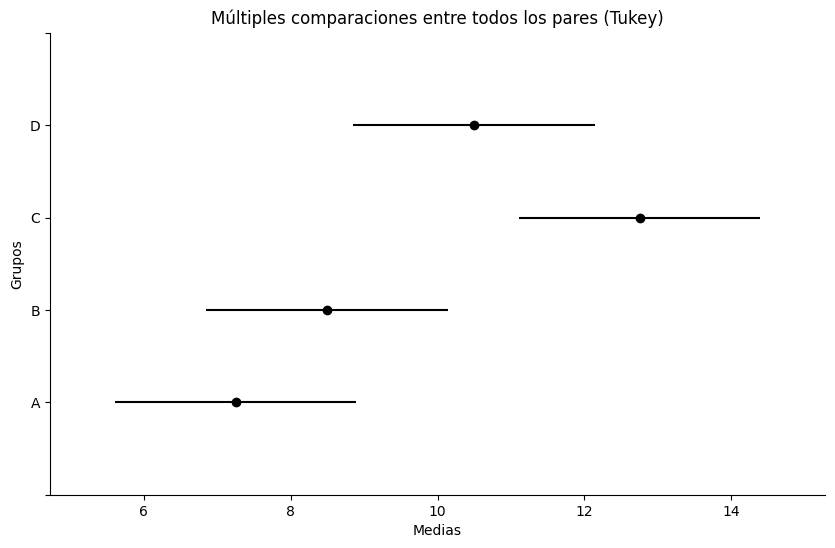

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Anel Rocio Valdez Cabrera

#***Conclusión**

Dado que se encontró que todas las pruebas cuentan con valores P mayores que el nivel de significancia, se les reconoce el cumplimiento del supuesto de normalidad; de igual manera, se muestra la igualdad entre las varianzas de los métodos (siendo el valor P [de .4779]mayor al nivel de significancia [.05])

Con las pruebas ANOVA y Turkey por otro lado, se encontró una diferencia significativamente mayor en los promedios de tiempo entre el método C y el resto de los métodos

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [9]:
import pandas as pd
from io import StringIO

datos = '''
Tipo de cuero,Observaciones
A,264
A,260
A,258
A,256
B,209
B,208
B,206
B,204
C,220
C,263
C,219
C,225
D,217
D,226
D,215
D,227
'''

# Para convertir los datos en DataFrame
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

print(df)
#Anel Rocio Valdez Cabrera

   Tipo de cuero  Observaciones
0              A            264
1              A            260
2              A            258
3              A            256
4              B            209
5              B            208
6              B            206
7              B            204
8              C            220
9              C            263
10             C            219
11             C            225
12             D            217
13             D            226
14             D            215
15             D            227


#**Supuesto de normalidad : test de Shapiro**

In [13]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Tipo de cuero'] == 'A']['Observaciones'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Tipo de cuero'] == 'B']['Observaciones'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Tipo de cuero'] == 'C']['Observaciones'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Tipo de cuero'] == 'D']['Observaciones'], "Grupo D", nivel_de_significancia)

#Anel Rocio Valdez Cabrera


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9714
Valor p: 0.8500
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9631
Valor p: 0.7982
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.7299
Valor p: 0.0246
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.8421
Valor p: 0.2017
Interpretación: Los datos tienen una distribución normal.


# **Supuesto homoscedasticidad: test de Barlett**


In [14]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Tipo de cuero'] == 'A']['Observaciones'],
    df[df['Tipo de cuero'] == 'B']['Observaciones'],
    df[df['Tipo de cuero'] == 'C']['Observaciones'],
    df[df['Tipo de cuero'] == 'D']['Observaciones'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Anel Rocio Valdez Cabrera

Estadístico de Bartlett: 14.511364156154379
Valor p: 0.0022856218513457966
Rechazamos la hipótesis nula: Las varianzas no son iguales.


Dado que el valor P estimado es superior al nivel de significancia deseado; podemos rechazar la hipótesis nula dado que las varianzas no son iguales, siendo entonces que al menos un tipo de cuero no sigue una distribución normal

#**Kruskal**



In [16]:
# Si al menos un grupo no sigue una distribución normal
from scipy.stats import kruskal

# Prueba de Kruskal-Wallis
kruskal_result = kruskal(
    df[df['Tipo de cuero'] == 'A']['Observaciones'],
    df[df['Tipo de cuero'] == 'B']['Observaciones'],
    df[df['Tipo de cuero'] == 'C']['Observaciones'],
    df[df['Tipo de cuero'] == 'D']['Observaciones']
)

# Mostrar resultados
print("Resultados de la prueba de Kruskal-Wallis:")
print(f"Estadístico de prueba: {kruskal_result.statistic:.2f}")
print(f"Valor p: {kruskal_result.pvalue:.4f}")

# Interpretación
if kruskal_result.pvalue < 0.05:
    print("Interpretación: Existen diferencias significativas entre al menos dos grupos.")
else:
    print("Interpretación: No hay diferencias significativas entre los grupos.")

#Anel Rocio Valdez Cabrera

Resultados de la prueba de Kruskal-Wallis:
Estadístico de prueba: 11.54
Valor p: 0.0092
Interpretación: Existen diferencias significativas entre al menos dos grupos.


#**Turkey**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B   -52.75 0.0001 -76.1055 -29.3945   True
     A      C   -27.75 0.0189 -51.1055  -4.3945   True
     A      D   -38.25 0.0019 -61.6055 -14.8945   True
     B      C     25.0 0.0348   1.6445  48.3555   True
     B      D     14.5 0.3015  -8.8555  37.8555  False
     C      D    -10.5 0.5599 -33.8555  12.8555  False
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

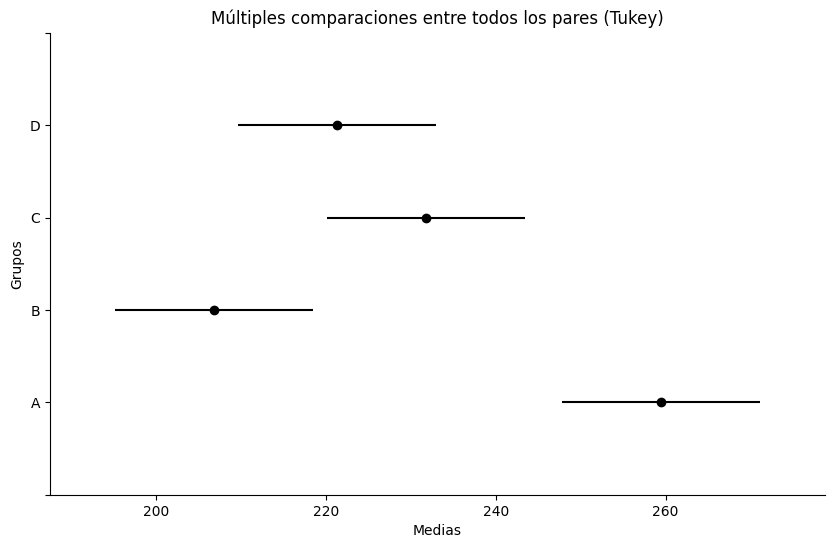

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Observaciones'], groups=df['Tipo de cuero'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Anel Rocio Valdez Cabrera

#**Conclusión**

El análisis de tipos de cueros en relación con el desgaste de las suelas (pérdida de peso) nos indica que los tipos de cuero A, B y D cumplen con el supuesto de normalidad, mientas que el cuero C no lo hace (.0246 < 0.05). Así mismo, la prueba de Bartlett rechazó la hipótesis nula de igualdad de varianzas entre los grupos (valor p = 0.0023), esto sugiere que las varianzas no son homogéneas.

Dado que al menos uno de los tipos de cuero no cumple con la normalidad y las varianzas no son homogéneas, se utilizó la prueba no paramétrica de Kruskal-Wallis para analizar las diferencias. Resultando en la prueba que hay diferencias significativas entre los tipos de cuero; complementando esta información, la prueba de Turkey indica que:

El cuero B presentó menor desgaste en comparación con el cuero C y A.
El cuero C tuvo mayor desgaste en comparación con los demás.
Los cueros A y D no presentaron diferencias significativas entre sí.

3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [18]:
import pandas as pd
from io import StringIO

# Datos proporcionados
datos = '''
tratamiento,tiempo
T1,213
T2,76
T3,57
T4,84
T1,214
T2,85
T3,67
T4,82
T1,204
T2,74
T3,55
T4,85
T1,208
T2,78
T3,64
T4,92
T1,212
T2,82
T3,61
T4,87
T1,200
T2,75
T3,63
T4,79
T1,207
T2,82
T3,63
T4,90
'''

# Convertir los datos en DataFrame
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

print(df)

#Anel Rocio Valdez Cabrera

   tratamiento  tiempo
0           T1     213
1           T2      76
2           T3      57
3           T4      84
4           T1     214
5           T2      85
6           T3      67
7           T4      82
8           T1     204
9           T2      74
10          T3      55
11          T4      85
12          T1     208
13          T2      78
14          T3      64
15          T4      92
16          T1     212
17          T2      82
18          T3      61
19          T4      87
20          T1     200
21          T2      75
22          T3      63
23          T4      79
24          T1     207
25          T2      82
26          T3      63
27          T4      90


#**Supuesto de normalidad: test de Shapiro**

In [19]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['tratamiento'] == 'T1']['tiempo'], "Tratamiento 1", nivel_de_significancia)
prueba_shapiro(df[df['tratamiento'] == 'T2']['tiempo'], "Tratamiento 2", nivel_de_significancia)
prueba_shapiro(df[df['tratamiento'] == 'T3']['tiempo'], "Tratamiento 3", nivel_de_significancia)
prueba_shapiro(df[df['tratamiento'] == 'T4']['tiempo'], "Tratamiento 4", nivel_de_significancia)


Prueba de Shapiro-Wilk para Tratamiento 1:
Estadístico: 0.9387
Valor p: 0.6269
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Tratamiento 2:
Estadístico: 0.9200
Valor p: 0.4697
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Tratamiento 3:
Estadístico: 0.9413
Valor p: 0.6506
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Tratamiento 4:
Estadístico: 0.9847
Valor p: 0.9793
Interpretación: Los datos tienen una distribución normal.


#**Supuesto de homocedasticidad**

In [23]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['tratamiento'] == 'T1']['tiempo'],
    df[df['tratamiento'] == 'T2']['tiempo'],
    df[df['tratamiento'] == 'T3']['tiempo'],
    df[df['tratamiento'] == 'T4']['tiempo'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Anel Rocio Valdez Cabrera

Estadístico de Bartlett: 0.33019728661304565
Valor p: 0.9542526447837091
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


Nuestros tratamientos cumplen con nuestro suspuesto de normalidad y no podemos rechazar nuestra hipótesis nula, dado que las varianzas de los mismos métodos son iguales

#**Tabla ANOVA**

In [21]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['tratamiento'] == 'T1']['tiempo'],
    df[df['tratamiento'] == 'T2']['tiempo'],
    df[df['tratamiento'] == 'T3']['tiempo'],
    df[df['tratamiento'] == 'T4']['tiempo'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

    #Anel Rocio Valdez Cabrera

Resultados del ANOVA:
F-Estadístico: 1558.97
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


#**Turkey**

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    T1     T2 -129.4286    0.0 -136.0757 -122.7815   True
    T1     T3 -146.8571    0.0 -153.5043   -140.21   True
    T1     T4 -122.7143    0.0 -129.3614 -116.0672   True
    T2     T3  -17.4286    0.0  -24.0757  -10.7815   True
    T2     T4    6.7143 0.0471    0.0672   13.3614   True
    T3     T4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

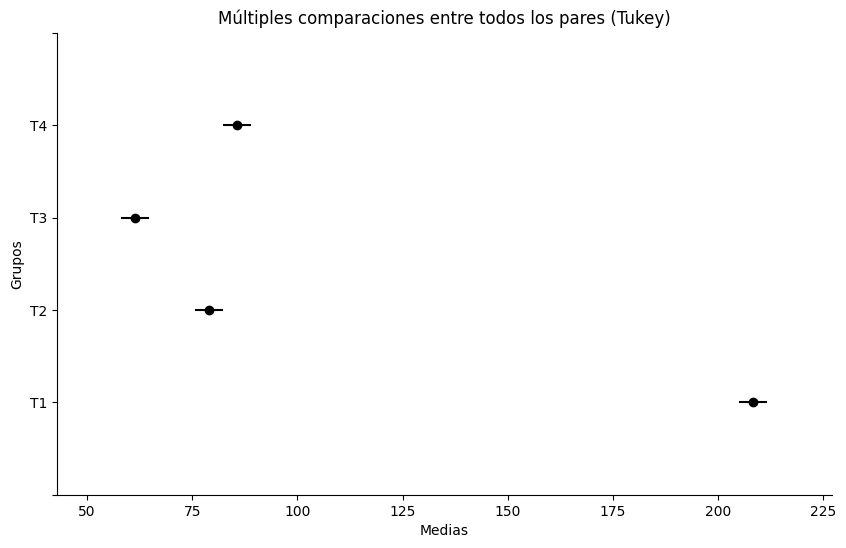

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Anel Rocio Valdez Cabrera

#**Conclusión**


El análisis de los tratamientos aplicados a los frijoles para reducir su tiempo de cocción revela diferencias significativas entre ellos, como se muestra en nuestra prueva ANOVA (mostrandonos que F = 1558.97 < valor p  0.0001)< encontrandose en la prueba Turkey que T1 (control) tuvo el mayor tiempo de cocción, siendo significativamente diferente de los demás tratamientos.

T3 (agua con sal común) presentó el menor tiempo de cocción.

T2 (bicarbonato) y T4 (mezcla de bicarbonato y sal común) tuvieron tiempos intermedios, pero significativamente más bajos que el control (T1).

Entre T2 y T4 no se encontraron diferencias significativas.

A pesar de que según la prueba de Shapiro todos los tratamientos cumplen el supuesti de normalidad y la prueba de Bartlett confirmó la igualdad de varianzas entre los tratamientos


4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [24]:
import pandas as pd
from io import StringIO

# Datos proporcionados
datos = '''
Temperatura,Intensidad
20°C,15
40°C,17
60°C,23
80°C,28
100°C,45
20°C,18
40°C,21
60°C,19
80°C,32
100°C,51
20°C,13
40°C,11
60°C,25
80°C,34
100°C,57
20°C,12
40°C,16
60°C,22
80°C,31
100°C,48
'''

# Crear DataFrame
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

print(df)

#Anle Rocio Valdez Cabrera

   Temperatura  Intensidad
0         20°C          15
1         40°C          17
2         60°C          23
3         80°C          28
4        100°C          45
5         20°C          18
6         40°C          21
7         60°C          19
8         80°C          32
9        100°C          51
10        20°C          13
11        40°C          11
12        60°C          25
13        80°C          34
14       100°C          57
15        20°C          12
16        40°C          16
17        60°C          22
18        80°C          31
19       100°C          48


# **Supuestos dee normalidad: test de Shapiro**

In [25]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Temperatura'] == '20°C']['Intensidad'], "Temperatura 20°C", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '40°C']['Intensidad'], "Temperatura 40°C", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '60°C']['Intensidad'], "Temperatura 60°C", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '80°C']['Intensidad'], "Temperatura 80°C", nivel_de_significancia)
prueba_shapiro(df[df['Temperatura'] == '100°C']['Intensidad'], "Temperatura 100°C", nivel_de_significancia)

#Anel Rocio Valdez Cabrera


Prueba de Shapiro-Wilk para Temperatura 20°C:
Estadístico: 0.9456
Valor p: 0.6889
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Temperatura 40°C:
Estadístico: 0.9763
Valor p: 0.8800
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Temperatura 60°C:
Estadístico: 0.9815
Valor p: 0.9109
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Temperatura 80°C:
Estadístico: 0.9815
Valor p: 0.9109
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Temperatura 100°C:
Estadístico: 0.9714
Valor p: 0.8500
Interpretación: Los datos tienen una distribución normal.


#**Supuesto homoscedasticidad: test de Barlett**

In [26]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Temperatura'] == '20°C']['Intensidad'],
    df[df['Temperatura'] == '40°C']['Intensidad'],
    df[df['Temperatura'] == '60°C']['Intensidad'],
    df[df['Temperatura'] == '80°C']['Intensidad'],
    df[df['Temperatura'] == '100°C']['Intensidad'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Anel Rocio Valdez Cabrera

Estadístico de Bartlett: 2.474789330634734
Valor p: 0.6491557722441552
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


#**Tabla ANOVA**

In [27]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['Temperatura'] == '20°C']['Intensidad'],
    df[df['Temperatura'] == '40°C']['Intensidad'],
    df[df['Temperatura'] == '60°C']['Intensidad'],
    df[df['Temperatura'] == '80°C']['Intensidad'],
    df[df['Temperatura'] == '100°C']['Intensidad'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

    #Anel Rocio Valdez Cabrera

Resultados del ANOVA:
F-Estadístico: 68.05
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


#**Turkey**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 100°C   20°C   -35.75    0.0 -43.4801 -28.0199   True
 100°C   40°C    -34.0    0.0 -41.7301 -26.2699   True
 100°C   60°C    -28.0    0.0 -35.7301 -20.2699   True
 100°C   80°C    -19.0    0.0 -26.7301 -11.2699   True
  20°C   40°C     1.75 0.9535  -5.9801   9.4801  False
  20°C   60°C     7.75 0.0493   0.0199  15.4801   True
  20°C   80°C    16.75 0.0001   9.0199  24.4801   True
  40°C   60°C      6.0 0.1696  -1.7301  13.7301  False
  40°C   80°C     15.0 0.0002   7.2699  22.7301   True
  60°C   80°C      9.0 0.0191   1.2699  16.7301   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

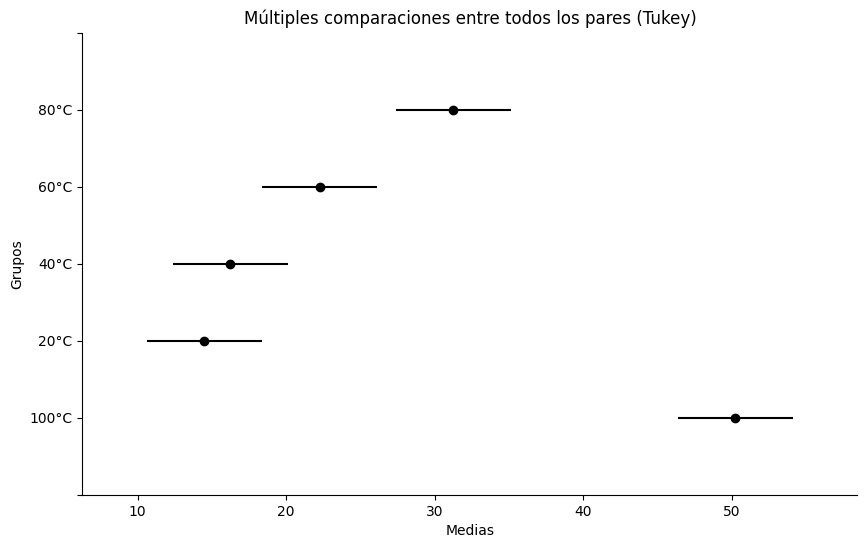

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Intensidad'], groups=df['Temperatura'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Anel Rocio Valdez Cabrera

#**Conclusión**


El análisis de los valores de intensidad de corriente en cinco niveles de temperatura reveló diferencias significativas entre los grupos. La prueba de Shapiro-Wilk confirma que los datos en cada nivel de temperatura siguen una distribución normal (p > 0.05). Mientras que  la prueba de Bartlett muestra que las varianzas entre los grupos son homogéneas (p = 0.6492). Esto valida el uso del análisis ANOVA; el cual muestra diferencias significativas en las intensidades de corriente medidas a diferentes temperaturas. Lo que  sugiere que la temperatura tiene un impacto significativo en el deterioro medido por la intensidad de corriente.


Sin embargo, los resultados de nuestra prueba Tukey indican que:

Las temperaturas más altas (80°C y 100°C) tuvieron valores significativamente mayores de intensidad de corriente en comparación con las temperaturas más bajas (20°C, 40°C, y 60°C).

100°C mostró las intensidades de corriente más altas, lo que refleja el mayor deterioro.

Entre las temperaturas más bajas (20°C y 40°C), no se encontraron diferencias significativas.

La intensidad de corriente aumenta significativamente con la temperatura, especialmente en niveles superiores a 60°C, lo que indica un mayor deterioro de los tableros electrónicos a temperaturas altas. Dado que el gráfico generado muestra las medias de intensidad de corriente para cada nivel de temperatura con intervalos de confianza, indicando visualmente las diferencias entre grupos.


5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [29]:
import pandas as pd
from io import StringIO

# Datos en formato CSV
datos = '''
Tratamiento,Porcentaje
con_tratamiento,5.3
con_tratamiento,4.0
con_tratamiento,4.0
con_tratamiento,2.6
con_tratamiento,2.1
con_tratamiento,5.1
con_tratamiento,4.1
con_tratamiento,3.2
con_tratamiento,5.1
con_tratamiento,2.2
con_tratamiento,4.1
sin_tratamiento,8.0
sin_tratamiento,13.2
sin_tratamiento,7.2
sin_tratamiento,8.2
sin_tratamiento,9.1
sin_tratamiento,6.7
sin_tratamiento,12.6
sin_tratamiento,16.3
sin_tratamiento,9.2
sin_tratamiento,6.4
sin_tratamiento,7.2
sin_tratamiento,17.2
sin_tratamiento,12.3
'''

# Convertir a DataFrame
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

print(df)

#Anel Rocio Valdez Cabrera

        Tratamiento  Porcentaje
0   con_tratamiento         5.3
1   con_tratamiento         4.0
2   con_tratamiento         4.0
3   con_tratamiento         2.6
4   con_tratamiento         2.1
5   con_tratamiento         5.1
6   con_tratamiento         4.1
7   con_tratamiento         3.2
8   con_tratamiento         5.1
9   con_tratamiento         2.2
10  con_tratamiento         4.1
11  sin_tratamiento         8.0
12  sin_tratamiento        13.2
13  sin_tratamiento         7.2
14  sin_tratamiento         8.2
15  sin_tratamiento         9.1
16  sin_tratamiento         6.7
17  sin_tratamiento        12.6
18  sin_tratamiento        16.3
19  sin_tratamiento         9.2
20  sin_tratamiento         6.4
21  sin_tratamiento         7.2
22  sin_tratamiento        17.2
23  sin_tratamiento        12.3


#**Supuesto de normalidad: test de Shapiro**

In [1]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Tratamiento'] == 'con_tratamiento']['porcentaje'], "con_tratamientoTratamiento", nivel_de_significancia)
prueba_shapiro(df[df['Tratamiento'] == 'sin_tratamiento']['porcentaje'], "sin_tratamiento", nivel_de_significancia)


#Anel Rocio Valdez Cabrera

NameError: name 'df' is not defined

**Supuesto homoscedasticidad: test de Barlett**

In [ ]:
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(

   df[df['Tratamiento'] == 'con_tratamiento']['porcentaje'],
   df[df['Tratamiento'] == 'sin_tratamiento']['porcentaje'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Anel Rocio Valdez Cabrera

#**Kruskal**

In [ ]:
# Si al menos un grupo no sigue una distribución normal
from scipy.stats import kruskal

# Prueba de Kruskal-Wallis
kruskal_result = kruskal(
    df[df['Tratamiento'] == 'con_tratamiento']['porcentaje'],
    df[df['Tratamiento'] == 'sin_tratamiento']['porcentaje']
)

# Mostrar resultados
print("Resultados de la prueba de Kruskal-Wallis:")
print(f"Estadístico de prueba: {kruskal_result.statistic:.2f}")
print(f"Valor p: {kruskal_result.pvalue:.4f}")

# Interpretación
if kruskal_result.pvalue < 0.05:
    print("\nInterpretación: Existen diferencias significativas entre al menos dos grupos.")
else:
    print("\nInterpretación: No hay diferencias significativas entre los grupos.")

    #Anel Rocio Valdez Cabrera

Resultados de la prueba de Kruskal-Wallis:
Estadístico de prueba: 17.19
Valor p: 0.0000

Interpretación: Existen diferencias significativas entre al menos dos grupos.


#**Turkey**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje'], groups=df['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Anel Rocio Valdez Cabrera

6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [2]:
import pandas as pd
from io import StringIO

# Datos en formato CSV
datos = '''
%_almidon,Dureza
2,4.3
2,5.2
2,4.8
2,4.5
5,6.5
5,7.3
5,6.9
5,6.1
10,9.0
10,7.8
10,8.5
10,8.1
'''

# Convertir a DataFrame
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

print(df)

#Anel Rocio Valdez Cabrera

    %_almidon  Dureza
0           2     4.3
1           2     5.2
2           2     4.8
3           2     4.5
4           5     6.5
5           5     7.3
6           5     6.9
7           5     6.1
8          10     9.0
9          10     7.8
10         10     8.5
11         10     8.1


#**Supuesto de normalidad**

In [3]:
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    if len(datos) < 3:
        print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}: No hay suficientes datos (mínimo 3).")
        return
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo
prueba_shapiro(df[df['%_almidon'] == 2]['Dureza'], "Grupo 2", nivel_de_significancia)
prueba_shapiro(df[df['%_almidon'] == 5]['Dureza'], "Grupo 5", nivel_de_significancia)
prueba_shapiro(df[df['%_almidon'] == 10]['Dureza'], "Grupo 10", nivel_de_significancia)

#Anel Rocio Valdez Cabrera


Prueba de Shapiro-Wilk para Grupo 2:
Estadístico: 0.9713
Valor p: 0.8497
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 5:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 10:
Estadístico: 0.9807
Valor p: 0.9058
Interpretación: Los datos tienen una distribución normal.


#**Supuesto de homocesasticidad**

In [4]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['%_almidon'] == 2]['Dureza'],
    df[df['%_almidon'] == 5]['Dureza'],
    df[df['%_almidon'] == 10]['Dureza'],

)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Anel Rocio Valdez Cabrera

Estadístico de Bartlett: 0.25398027627307607
Valor p: 0.8807423583152111
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


#**ANOVA**

In [5]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['%_almidon'] == 2]['Dureza'],
    df[df['%_almidon'] == 5]['Dureza'],
    df[df['%_almidon'] == 10]['Dureza'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

    #Anel Rocio Valdez Cabrera

Resultados del ANOVA:
F-Estadístico: 58.10
Valor p: 0.00001

Conclusión: Hay diferencias significativas entre al menos dos grupos.


#**Turkey**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     2      5      2.0 0.0006 1.0532 2.9468   True
     2     10     3.65    0.0 2.7032 4.5968   True
     5     10     1.65 0.0023 0.7032 2.5968   True
--------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

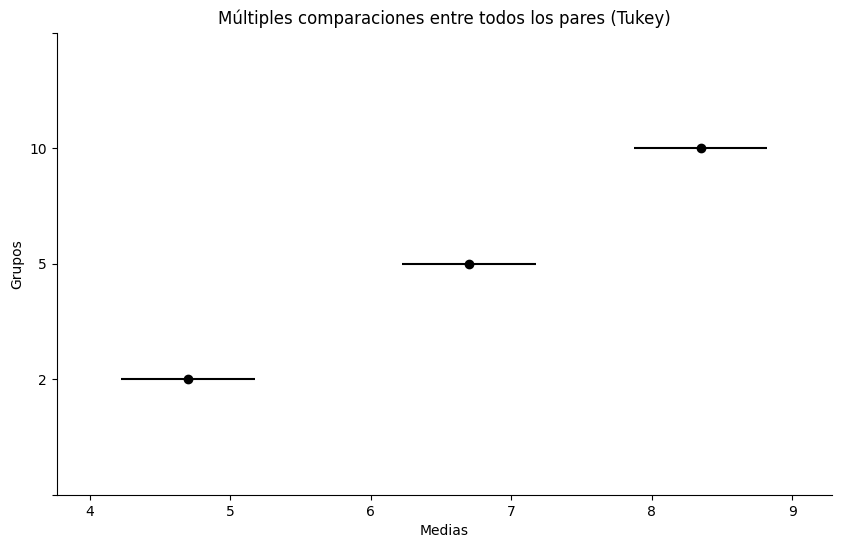

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Dureza'], groups=df['%_almidon'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Anel Rocio Valdez Cabrera

7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [7]:
import pandas as pd
from io import StringIO

# Datos en formato CSV
datos = '''
nivel,rendimiento
1,14.823
1,14.676
1,14.720
1,14.514
1,15.065
2,25.151
2,25.401
2,25.131
2,25.031
2,25.267
3,32.605
3,32.460
3,32.256
3,32.669
3,32.111
'''

# Convertir a DataFrame
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

print(df)

#Anel Rocio Valdez Cabrera

    nivel  rendimiento
0       1       14.823
1       1       14.676
2       1       14.720
3       1       14.514
4       1       15.065
5       2       25.151
6       2       25.401
7       2       25.131
8       2       25.031
9       2       25.267
10      3       32.605
11      3       32.460
12      3       32.256
13      3       32.669
14      3       32.111


#**Normalidad Shapiro**

In [8]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['nivel'] == 1 ]['rendimiento'], "niveles_de_fertilización_1", nivel_de_significancia)
prueba_shapiro(df[df['nivel'] == 2 ]['rendimiento'], "niveles_de_fertilización_2", nivel_de_significancia)
prueba_shapiro(df[df['nivel'] == 3 ]['rendimiento'], "niveles_de_fertilización_3", nivel_de_significancia)


#Anel Rocio Valdez Cabrera


Prueba de Shapiro-Wilk para niveles_de_fertilización_1:
Estadístico: 0.9711
Valor p: 0.8821
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para niveles_de_fertilización_2:
Estadístico: 0.9647
Valor p: 0.8402
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para niveles_de_fertilización_3:
Estadístico: 0.9406
Valor p: 0.6701
Interpretación: Los datos tienen una distribución normal.


Homocedasticidad: Barlett

In [9]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['nivel'] == 1]['rendimiento'],
    df[df['nivel'] == 2]['rendimiento'],
    df[df['nivel'] == 3]['rendimiento'],

)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 0.8865708483161732
Valor p: 0.6419239603315805
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


#**ANOVA**

In [10]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['nivel'] == 1]['rendimiento'],
    df[df['nivel'] == 2]['rendimiento'],
    df[df['nivel'] == 3]['rendimiento'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

    #Anel Rocio Valdez Cabrera

Resultados del ANOVA:
F-Estadístico: 10130.58
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


#**Turkey**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  10.4366   0.0 10.1038 10.7694   True
     1      3  17.6606   0.0 17.3278 17.9934   True
     2      3    7.224   0.0  6.8912  7.5568   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

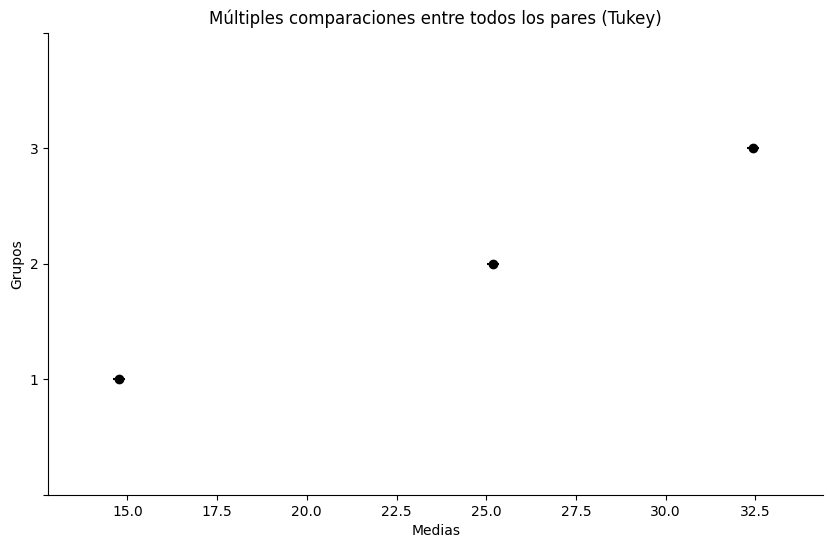

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimiento'], groups=df['nivel'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Anel Rocio Valdez Cabrera

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [12]:
import pandas as pd
from io import StringIO

# Datos en formato CSV
datos = '''
Aglutinante,%_de_friabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''

# Crear un DataFrame con pandas
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

print(df)

#Anel Rocio Valdez Cabrera

   Aglutinante  %_de_friabilidad
0          PVP             0.485
1          PVP             0.250
2          PVP             0.073
3          PVP             0.205
4          PVP             0.161
5          CMC             9.640
6          CMC             9.370
7          CMC             9.530
8          CMC             9.860
9          CMC             9.790
10         Gre             0.289
11         Gre             0.275
12         Gre             0.612
13         Gre             0.152
14         Gre             0.137


#**Supuesto de normalidad: test de Shapiro**

In [13]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Aglutinante'] == 'PVP' ]['%_de_friabilidad'], "Grupo 1", nivel_de_significancia)
prueba_shapiro(df[df['Aglutinante'] == 'CMC' ]['%_de_friabilidad'], "Grupo 2", nivel_de_significancia)
prueba_shapiro(df[df['Aglutinante'] == 'Gre']['%_de_friabilidad'], "Grupo 3", nivel_de_significancia)

#Anel Rocio Valdez Cabrera


Prueba de Shapiro-Wilk para Grupo 1:
Estadístico: 0.9147
Valor p: 0.4962
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 2:
Estadístico: 0.9679
Valor p: 0.8616
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 3:
Estadístico: 0.8313
Valor p: 0.1424
Interpretación: Los datos tienen una distribución normal.


#**Supuesto homoscedasticidad: test de Barlett**

In [14]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
      df[df['Aglutinante'] == 'PVP' ]['%_de_friabilidad'],
      df[df['Aglutinante'] == 'CMC' ]['%_de_friabilidad'],
      df[df['Aglutinante'] == 'Gre']['%_de_friabilidad'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Anel Rocio Valdez Cabrera

Estadístico de Bartlett: 0.24372837838984224
Valor p: 0.8852685893786298
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


#**ANOVA**

In [15]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
      df[df['Aglutinante'] == 'PVP' ]['%_de_friabilidad'],
      df[df['Aglutinante'] == 'CMC' ]['%_de_friabilidad'],
      df[df['Aglutinante'] == 'Gre']['%_de_friabilidad'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

    #Anel Rocio Valdez Cabrera

Resultados del ANOVA:
F-Estadístico: 4420.97
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


#**Turkey**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

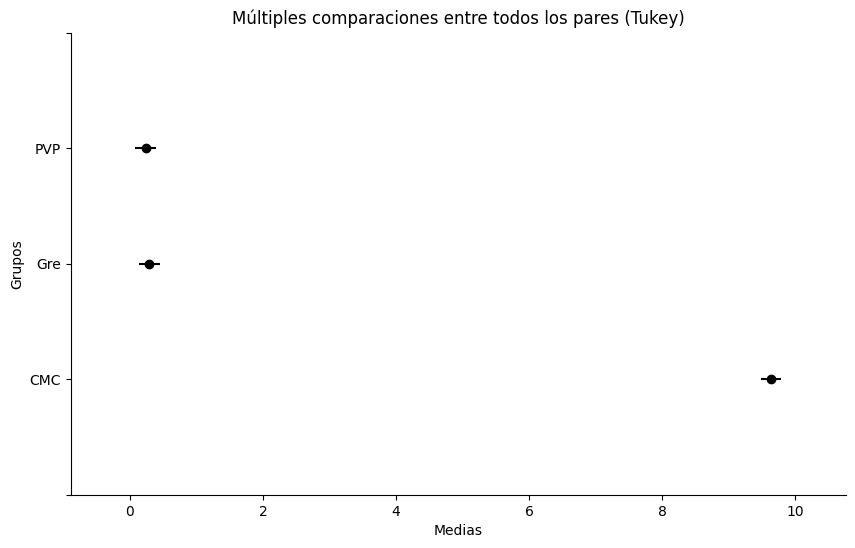

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['%_de_friabilidad'], groups=df['Aglutinante'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

    #Anel Rocio Valdez Cabrera

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [18]:
import pandas as pd
from io import StringIO

# Datos en formato CSV
datos = '''
clona,azucares
1,8.69
1,6.68
1,6.83
1,6.43
1,10.30
2,8.00
2,16.41
2,12.43
2,10.99
2,15.53
3,17.39
3,13.73
3,15.62
3,17.05
3,15.42
4,10.37
4,9.16
4,8.83
4,4.40
4,10.38
'''
# Convertir a DataFrame
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

print(df)

#Anel Rocio Valdez Cabrera

    clona  azucares
0       1      8.69
1       1      6.68
2       1      6.83
3       1      6.43
4       1     10.30
5       2      8.00
6       2     16.41
7       2     12.43
8       2     10.99
9       2     15.53
10      3     17.39
11      3     13.73
12      3     15.62
13      3     17.05
14      3     15.42
15      4     10.37
16      4      9.16
17      4      8.83
18      4      4.40
19      4     10.38


#**Supuesto de normalidad: test de Shapiro**

In [19]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['clona'] == 1 ]['azucares'], "Grupo 1", nivel_de_significancia)
prueba_shapiro(df[df['clona'] == 2 ]['azucares'], "Grupo 2", nivel_de_significancia)
prueba_shapiro(df[df['clona'] == 3 ]['azucares'], "Grupo 3", nivel_de_significancia)
prueba_shapiro(df[df['clona'] == 4 ]['azucares'], "Grupo 4", nivel_de_significancia)

#Anel Rocio Valdez Cabrera


Prueba de Shapiro-Wilk para Grupo 1:
Estadístico: 0.8411
Valor p: 0.1679
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 2:
Estadístico: 0.9539
Valor p: 0.7648
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 3:
Estadístico: 0.9348
Valor p: 0.6293
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 4:
Estadístico: 0.7772
Valor p: 0.0522
Interpretación: Los datos tienen una distribución normal.


#**Supuesto homoscedasticidad: test de Barlett**

In [ ]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['clona'] == 1 ]['azucares'],
    df[df['clona'] == 2 ]['azucares'],
    df[df['clona'] == 3 ]['azucares'],
    df[df['clona'] == 4 ]['azucares'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Anel Rocio Valdez Cabrera

#**ANOVA**

In [20]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['clona'] == 1 ]['azucares'],
    df[df['clona'] == 2 ]['azucares'],
    df[df['clona'] == 3 ]['azucares'],
    df[df['clona'] == 4 ]['azucares'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

    #Anel Rocio Valdez Cabrera

Resultados del ANOVA:
F-Estadístico: 12.33
Valor p: 0.00020

Conclusión: Hay diferencias significativas entre al menos dos grupos.


#**Turkey**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    4.886 0.0237   0.575  9.197   True
     1      3    8.056 0.0003   3.745 12.367   True
     1      4    0.842 0.9428  -3.469  5.153  False
     2      3     3.17 0.1939  -1.141  7.481  False
     2      4   -4.044 0.0699  -8.355  0.267  False
     3      4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

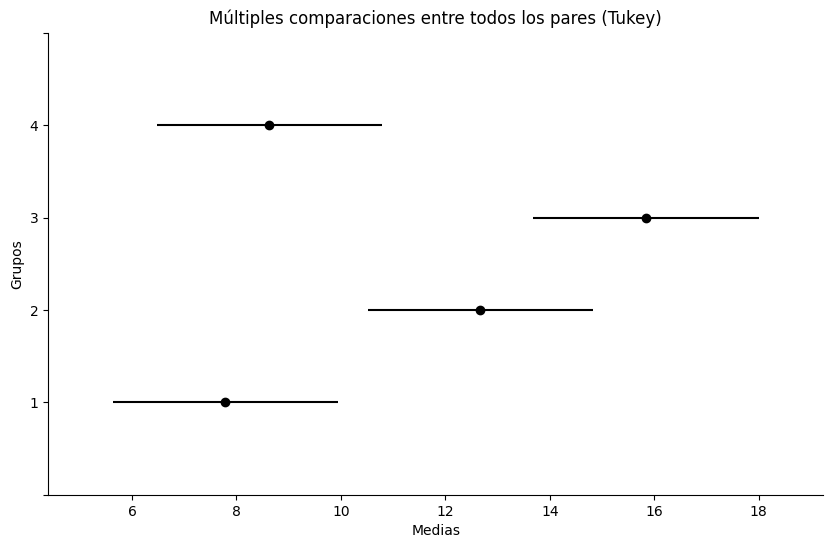

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['azucares'], groups=df['clona'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Anel Rocio Valdez Cabrera

10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [23]:
import pandas as pd
from io import StringIO

# Datos en formato CSV
datos = '''
tratamiento,valor
Con tratamiento,5.30
Sin tratamiento,8.02
Con tratamiento,4.03
Sin tratamiento,13.18
Con tratamiento,4.00
Sin tratamiento,7.15
Con tratamiento,2.56
Sin tratamiento,9.11
Con tratamiento,5.06
Sin tratamiento,8.23
Con tratamiento,4.06
Sin tratamiento,16.3
Con tratamiento,2.08
Sin tratamiento,9.20
Con tratamiento,4.03
Sin tratamiento,6.35
Con tratamiento,2.04
Sin tratamiento,7.15
Con tratamiento,1.18
Sin tratamiento,8.66
'''

# Convertir a DataFrame
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

print(df)

#Anel Rocio Valdez Cabrera

        tratamiento  valor
0   Con tratamiento   5.30
1   Sin tratamiento   8.02
2   Con tratamiento   4.03
3   Sin tratamiento  13.18
4   Con tratamiento   4.00
5   Sin tratamiento   7.15
6   Con tratamiento   2.56
7   Sin tratamiento   9.11
8   Con tratamiento   5.06
9   Sin tratamiento   8.23
10  Con tratamiento   4.06
11  Sin tratamiento  16.30
12  Con tratamiento   2.08
13  Sin tratamiento   9.20
14  Con tratamiento   4.03
15  Sin tratamiento   6.35
16  Con tratamiento   2.04
17  Sin tratamiento   7.15
18  Con tratamiento   1.18
19  Sin tratamiento   8.66


#**Supuesto de normalidad: test de Shapiro**

In [24]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['tratamiento'] == "Con tratamiento" ]['valor'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['tratamiento'] == "Sin tratamiento" ]['valor'], "Grupo B", nivel_de_significancia)

#Anel Rocio Valdez Cabrera


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9149
Valor p: 0.3162
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.8049
Valor p: 0.0166
Interpretación: Los datos no tienen una distribución normal.


#**Supuesto homoscedasticidad: test de Barlett**

In [25]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['tratamiento'] == "Con tratamiento"]['valor'],
    df[df['tratamiento'] == "Sin tratamiento"]['valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Anel Rocio Valdez Cabrera

Estadístico de Bartlett: 4.970612361881678
Valor p: 0.02578151815286211
Rechazamos la hipótesis nula: Las varianzas no son iguales.


#**Kruskal**

In [26]:
# Si al menos un grupo no sigue una distribución normal
from scipy.stats import kruskal

# Prueba de Kruskal-Wallis
kruskal_result = kruskal(
    df[df['tratamiento'] == 'Con tratamiento']['valor'],
    df[df['tratamiento'] == 'Sin tratamiento']['valor']
)

# Mostrar resultados
print("Resultados de la prueba de Kruskal-Wallis:")
print(f"Estadístico de prueba: {kruskal_result.statistic:.2f}")
print(f"Valor p: {kruskal_result.pvalue:.4f}")

# Interpretación
if kruskal_result.pvalue < 0.05:
    print("Interpretación: Existen diferencias significativas entre al menos dos grupos.")
else:
    print("Interpretación: No hay diferencias significativas entre los grupos.")

Resultados de la prueba de Kruskal-Wallis:
Estadístico de prueba: 14.31
Valor p: 0.0002
Interpretación: Existen diferencias significativas entre al menos dos grupos.


#**Tukey**

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1          group2     meandiff p-adj lower upper reject
-----------------------------------------------------------------
Con tratamiento Sin tratamiento    5.901   0.0  3.66 8.142   True
-----------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

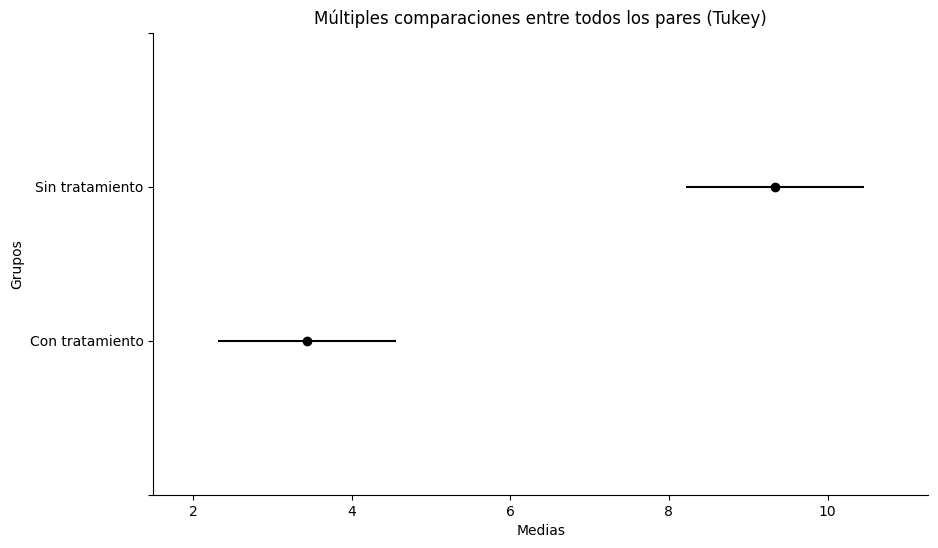

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Anel Rocio Valdez Cabrera

#**Conclusión**

Como se muestra en nuestro análisis, de detenctó en la prueba de Shapiro que en el grupo con tratamiento los datos tienen una distribución normal, mientras que en el grupo donde no se tiene tratamiento el supuesto de normalidad no se cumple. De igual manera, se rechaza la hipótesis nula de igualdad de varianzas, es decir, que las varianzas no son homogéneas, lo que refuerza la decisión de usar pruebas no paramétricas en el supuesto anterior.

En el análisis estadístico se perciben también las diferencias significativas entre ambos grupos, lo que nos indica que el tratamiento reduce el porcentaje de discos con defectos (diendo que en el gráfico se muestra que el grupo con tratamiento tiene un promedio significativamente menor, lo que resalta su efectividad)

#***CONCLUSIÓN***


En casi todos los casos analizados reflejan diferencias significativas en la variable de interés entre los grupos estudiados, lo que subraya la relevancia de los análisis estadísticos en la identificación de tratamientos efectivos. Las pruebas realizadas para evaluar la normalidad de los datos y la homogeneidad de las varianzas confirmaron que se cumplen los criterios requeridos para aplicar análisis paramétricos de manera adecuada. Asimismo, la independencia entre las variables se mantuvo constante, garantizando la validez y precisión de las conclusiones derivadas de los resultados. Este enfoque es altamente adaptable y puede emplearse en múltiples áreas, como el perfeccionamiento de productos, la optimización de procesos industriales o la selección de estrategias pedagógicas; por otra parte, las herramientas estadísticas corroboran que los datos respetan los supuestos fundamentales, lo cual respalda la fiabilidad y validez de los hallazgos. Este tipo de análisis es imprescindible para fundamentar decisiones informadas en evidencia sólida, permitiendo priorizar alternativas que ofrezcan mayores beneficios o impactos positivos en los contextos en los que se implementen.